In [1]:
import pandas as pd
import datetime as dt
from prophet import Prophet

data = pd.read_csv("../raw_data/JPM 2011-2021.csv",parse_dates = True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-06-10,40.590000,41.500000,40.099998,41.049999,31.059223,48545700
1,2011-06-13,41.290001,41.820000,40.720001,41.669998,31.528326,31767100
2,2011-06-14,42.130001,42.439999,41.480000,41.610001,31.482937,32103500
3,2011-06-15,41.020000,41.400002,40.250000,40.680000,30.779259,37336400
4,2011-06-16,40.630001,40.709999,39.700001,40.360001,30.537151,50316600


In [2]:
data.shape

(2516, 7)

In [3]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
import numpy as np

#stocks_df= data[(data.symbol=="JPM")]
#stocks_df= stocks_df[(data.date.dt.year == 2017) | (data.date.dt.year == 2018)]
#stocks_df= stocks_df[(stocks_df.date.dt.year > 2015 ) & (stocks_df.date.dt.year < 2021)]
#stocks_df.sort_values(by=["date"], inplace=True)
#stocks_df

In [6]:
#import numpy as np

#stocks_df= data[(data.symbol=="JPM")]
#stocks_df = stocks_df[(data.date.dt.year == 2016) | (data.date.dt.year == 2020)]
#stocks_df.sort_values(by=["date"], inplace=True)
#stocks_df

# Selectionner 10 actions de secteurs differents sur une periode de deux ans.
# GS,WMT,AAPL,AMZN,JPM,BA,CCL,CVX,KO,MSFT


In [7]:
data = data[["Date", "Adj Close"]].copy()  #à verifier, si il faut garder le .copy() ou pas
data.rename(columns={"Date": "ds", "Adj Close": "y"}, inplace=True)
data

,ds,y
0,2011-06-10,31.059223
1,2011-06-13,31.528326
2,2011-06-14,31.482937
3,2011-06-15,30.779259
4,2011-06-16,30.537151
...,...,...
2511,2021-06-03,166.169998
2512,2021-06-04,166.440002
2513,2021-06-07,165.660004
2514,2021-06-08,165.000000


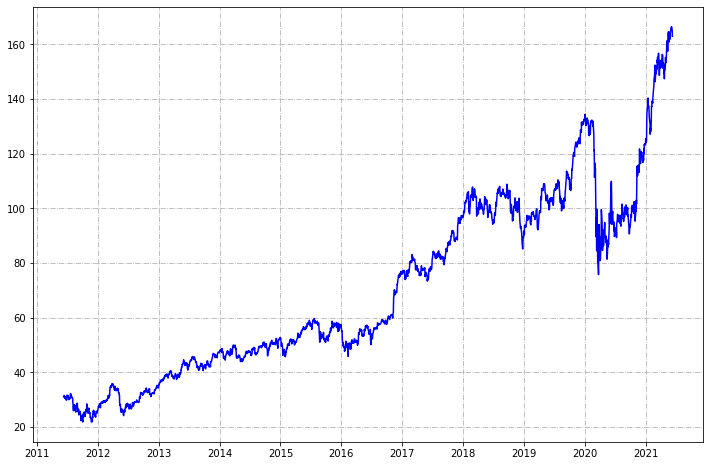

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.grid(linestyle='-.')

plt.plot(data['ds'], data['y'], 'b')
plt.show()

In [9]:
index=round(len(data)*80/100)
index

2013

In [10]:
train = data.iloc[:index]
test = data.iloc[index:]

In [11]:
train.shape, test.shape

((2013, 2), (503, 2))

In [12]:
train

,ds,y
0,2011-06-10,31.059223
1,2011-06-13,31.528326
2,2011-06-14,31.482937
3,2011-06-15,30.779259
4,2011-06-16,30.537151
...,...,...
2008,2019-06-05,103.328033
2009,2019-06-06,103.553223
2010,2019-06-07,102.417946
2011,2019-06-10,103.525055


In [13]:
model = Prophet(seasonality_mode='multiplicative', interval_width=0.95)
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
horizon = 36
future = model.make_future_dataframe(periods=horizon, freq='MS')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2044,2022-02-01,102.534346,-218.564310,429.727289
2045,2022-03-01,106.485033,-237.645074,459.887585
2046,2022-04-01,104.283879,-243.979586,469.754934
2047,2022-05-01,-197.206333,-917.658304,493.681829
2048,2022-06-01,107.171328,-280.359208,518.060465


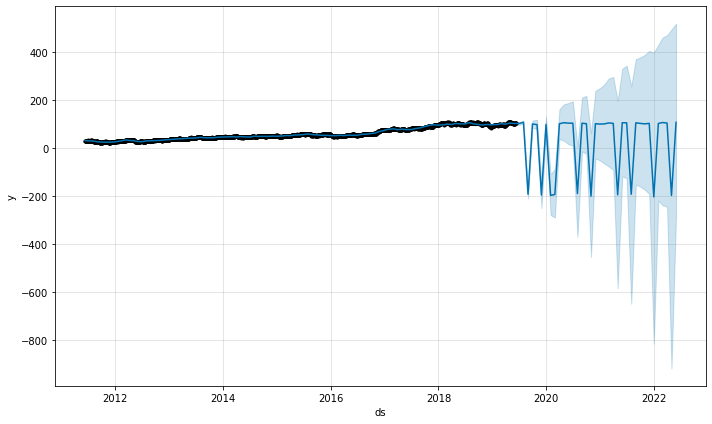

In [15]:
ax = model.plot(forecast);

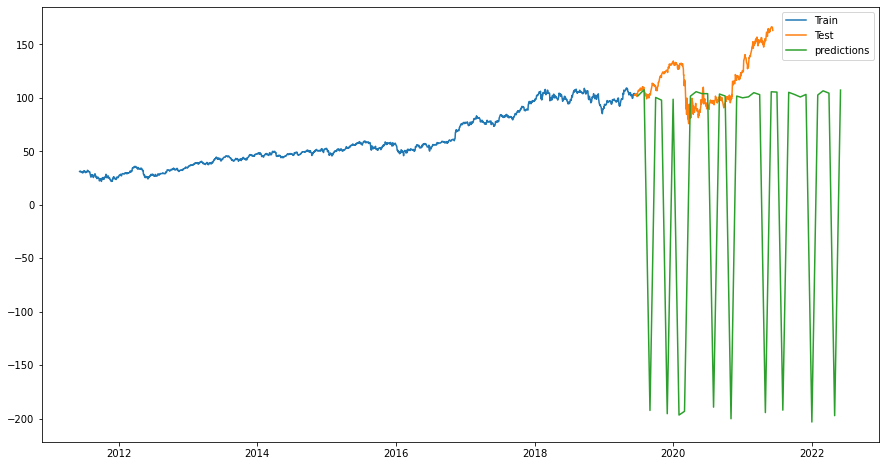

In [16]:
plt.figure(figsize=(15, 8))
plt.plot(train['ds'], train['y'], label="Train")
plt.plot(test['ds'], test['y'], label="Test")
plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label="predictions")
plt.legend(loc="best")
plt.show()

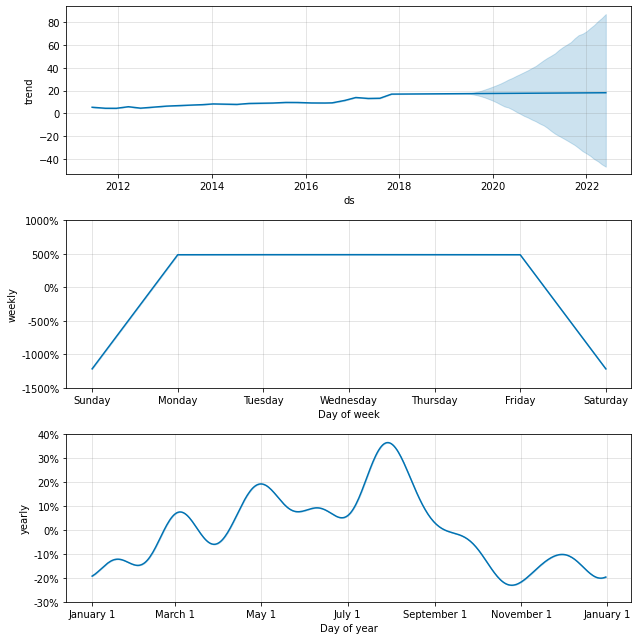

In [17]:
model.plot_components(forecast);

In [18]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
# Your code here
cv_results = cross_validation(model=model, initial=f'{50 * 5} days', horizon='35 days', period='180 days')

# Comment choisir le chiffre initial {XX*5} et horizon 'XX days' (ici initial=20 et horizon=75)

INFO:prophet:Making 15 forecasts with cutoffs between 2012-06-12 00:00:00 and 2019-05-07 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

In [19]:
cv_results

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-06-13,26.256636,24.895758,27.701763,26.704626,2012-06-12
1,2012-06-14,26.393891,24.998605,27.786895,26.977131,2012-06-12
2,2012-06-15,26.221863,24.820409,27.645432,27.272982,2012-06-12
3,2012-06-18,26.006855,24.603406,27.319026,26.953777,2012-06-12
4,2012-06-19,26.093570,24.837527,27.426754,27.545477,2012-06-12
...,...,...,...,...,...,...
351,2019-06-05,103.940214,98.188829,109.791146,103.328033,2019-05-07
352,2019-06-06,103.889265,98.208603,109.681446,103.553223,2019-05-07
353,2019-06-07,103.788288,98.158605,109.965485,102.417946,2019-05-07
354,2019-06-10,103.745180,97.992804,109.664455,103.525055,2019-05-07


In [20]:
data_p = performance_metrics(cv_results)
data_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4 days,11.904653,3.450312,2.555308,0.036625,0.033908,0.036500,0.529870
1,5 days,13.961670,3.736532,2.807769,0.039954,0.041150,0.039840,0.440000
2,6 days,16.548461,4.067980,2.940287,0.041144,0.037462,0.040751,0.462338
3,7 days,18.162450,4.261743,3.158547,0.045489,0.041150,0.044935,0.405714
4,8 days,18.988891,4.357624,3.214960,0.047979,0.044640,0.047365,0.405714
5,9 days,17.215493,4.149156,3.157414,0.049300,0.048043,0.048835,0.374286
6,10 days,13.785702,3.712910,2.828109,0.046561,0.044640,0.046557,0.402597
7,11 days,15.714839,3.964195,3.016846,0.047779,0.043835,0.047816,0.377143
8,12 days,19.054293,4.365122,3.231650,0.049883,0.043835,0.049811,0.392208
9,13 days,26.153987,5.114097,3.771086,0.056594,0.052219,0.056142,0.357143


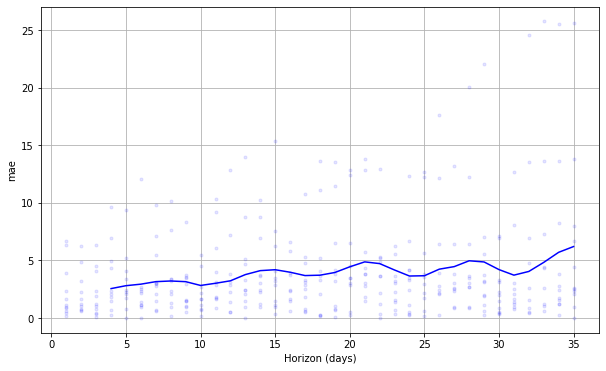

In [21]:
# Plot results below
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(cv_results, metric='mae');